# Stroke Prediction Project
## 1. Problem Definition: 
- Goal: predict whether a patient is likely to get stroke
## 2. Feature Selection:
-  Choose feature to train ML model
- Need to use  'Feature Engineering' to identify Feature needed
## 3. Splitting datasets
- data: dataset
- x: data[feature]
- y: target variable Stroke

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mydef

In [ ]:
path ='./data/healthcare-dataset-stroke-data.csv'
raw_df = pd.read_csv(path)

In [ ]:
df = raw_df
df.head()

In [ ]:
move_df = df['age']
df = df.drop(['age'],axis =1)
df.insert(9, 'age', move_df)

In [ ]:
id_df = df['id'] 
df = df.drop(['id'], axis= 1)

In [ ]:
df.info()

In [ ]:
mydef.find_percent_missing_data(df)

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan, strategy= 'mean')

In [ ]:
filled_bmi = impute.fit_transform(df.iloc[:, 7:8].values)
filled_bmi

In [ ]:
df['bmi'] = pd.DataFrame(filled_bmi)
df['bmi']

# Feature Engineering

In [ ]:
df.head()

In [ ]:
list_category_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease',]
for col in list_category_column:
    if col =='stroke':
        break
    plt.figure()
    sns.countplot(data =df, x=col);

In [ ]:
# Drop other
list_other_index = list(df[df['gender'] == 'Other'].index)
df = df.drop([index for index in list_other_index], axis= 0)

In [ ]:
df[list_category_column[0]].name

In [ ]:
for col in list_category_column:
    data = df[col].value_counts()
    labels = list(data.index)
    name = df[col].name
    plt.figure()
    mydef.draw_pie(list(data.values),labels, name)

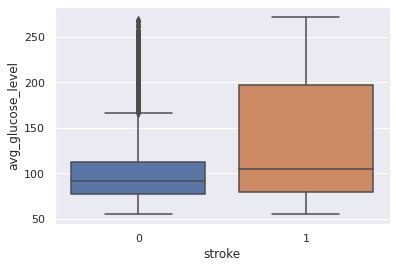

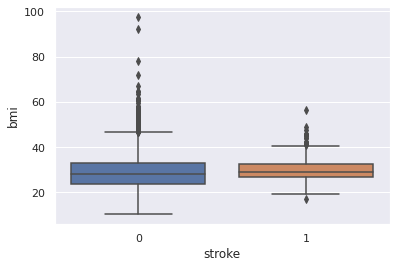

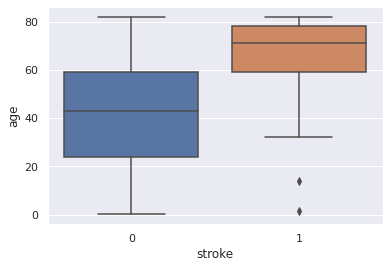

In [17]:
list_numberic_column = [ 'avg_glucose_level', 'bmi', 'age']
for col in list_numberic_column:
    plt.figure()
    sns.boxplot(data =df, x = 'stroke', y =col );

In [ ]:
for col in list_numberic_column:
    plt.figure();
    sns.displot(data =df, x = col, col ='stroke');

In [ ]:
sns.pairplot(data =df[list_numberic_column]);

### data Bias

In [ ]:
x = df.iloc[ : , 0:-1].values
y =df.iloc[:, -1].values

In [ ]:
x

In [ ]:
y

In [ ]:
# bmi index = 7
x[:, 7:8]

In [ ]:
x[:, 7:8]= impute.fit_transform(x[:, 7:8])
x

# Encode Categorical Data
## 1: Encode  Independent variable (X)

In [ ]:
df.info()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 0, 4, 5, 6, 9 is column index of gender, ever_married, work_type, Residence_type, smoking_status
list_column_index = [0, 3, 4, 5, 9]

gender = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [col for col in list_column_index] )], remainder = "passthrough")
x = (gender.fit_transform(x))

In [ ]:
x[0]

## 2: Encode Dependent Variable (y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

## Splitting the dataset (x =data, y = output) into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# 80 % train and 20 % test
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2 )

## Feature Scaling by StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train[: , 18:] = StandardScaler().fit_transform(x_train[: , 18:])
x_train

In [ ]:
x_test[: , 18:] = StandardScaler().fit_transform(x_test[: , 18:])
x_test